In [1]:
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [2]:
url ='https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt'
urllib.request.urlretrieve(url, 'ice_cream2.txt')
df = pd.DataFrame(columns=['Data', 'Temp', 'Customers'])
for i, line in enumerate(open('ice_cream2.txt', encoding='utf-8')):
    if i == 0:
        continue
    c = line.split()
    series = pd.Series([c[0],c[1],c[2]], index=df.columns)
    df = df.append(series, ignore_index = True)
df


,Data,Temp,Customers
0,1,33,382
1,2,33,324
2,3,34,338
3,4,34,317
4,5,35,341
5,6,35,360
6,7,34,339
7,8,32,329
8,9,28,218
9,10,35,402


In [3]:
clf = linear_model.LinearRegression()
X = df.loc[:, ['Temp']].as_matrix()
Y = df['Customers'].as_matrix()
clf.fit(X, Y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, Y))

[ 17.24825705]
-229.981812671
0.757512389685


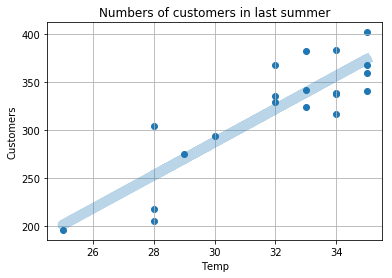

In [4]:
plt.scatter(X, Y)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temp")
plt.ylabel("Customers")
plt.plot(X, clf.predict(X),linewidth=10, alpha=0.3)
plt.grid()

In [5]:
#課題4.5
url2 = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
urllib.request.urlretrieve(url2, 'ice_cream3.txt')
df2 = pd.read_csv('ice_cream3.txt', sep='\s+', index_col=0)
df2

,駅からの距離(m),平均客数
店舗,,
1,10,795
2,1200,213
3,500,465
4,50,694
5,740,403
6,30,782
7,10,769
8,360,561
9,150,692


In [6]:
P = df2.loc[:, ['駅からの距離(m)']].as_matrix()
Q = df2['平均客数'].as_matrix()
clf.fit(P, Q)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(P, Q))

[-0.47614044]
755.34959721
0.959463580235


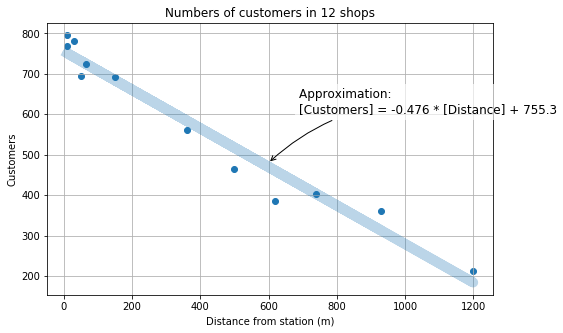

In [7]:
plt.figure(1, figsize=(8, 5))
plt.scatter(P, Q)
plt.title("Numbers of customers in 12 shops")
plt.xlabel("Distance from station (m)")
plt.ylabel("Customers")
plt.plot(P, clf.predict(P),linewidth=10, alpha=0.3)
plt.grid()
plt.annotate('Approximation: \n[Customers] = -0.476 * [Distance] + 755.3',
            xy=(600, 480), xycoords='data',
            xytext=(30, 50), textcoords='offset points',
            size = 12, bbox=dict(facecolor='white', edgecolor='None', alpha=0.65),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.show()